'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


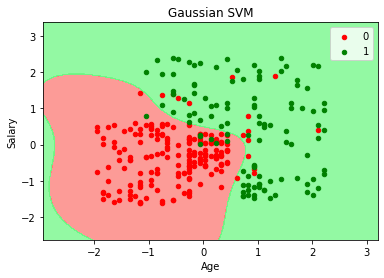

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
import matplotlib.cm
cmap = matplotlib.cm.get_cmap('plasma')


# Reading in data
ds = pd.read_csv("data/Social_Network_Ads.csv")
X = ds.iloc[:, 2:4].values
y = ds.iloc[:,4].values

# Splitting and scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X,y)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

# Classifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


clf = SVC(kernel='rbf', C = 20)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = (cm[0][0]+cm[1][1])/sum(sum(cm))

# Cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(clf, X=X_train, y=y_train, cv=10)

# Plot
from matplotlib.colors import ListedColormap

plt.figure()
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(X_set[:,0].min() - 1, 
                               X_set[:,0].max() + 1, 
                               step = 0.01),
                     np.arange(X_set[:,1].min() - 1, 
                               X_set[:,1].max() + 1, 
                               step = 0.01))
boundary = clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
plt.contourf(X1, X2, boundary, alpha = 0.75, 
             cmap = ListedColormap(('#fc7a74', '#6ff785')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), 
                label = j, s = 20)
plt.title('Gaussian SVM')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()
